In [33]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import keras_tuner as kt   # pip install keras-tuner


In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)   # (60000,28,28,1)
x_test  = np.expand_dims(x_test, -1)

In [15]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes (digits 0-9)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [17]:
# 5. Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/5
844/844 - 43s - 50ms/step - accuracy: 0.9498 - loss: 0.1686 - val_accuracy: 0.9827 - val_loss: 0.0600
Epoch 2/5
844/844 - 88s - 104ms/step - accuracy: 0.9848 - loss: 0.0502 - val_accuracy: 0.9865 - val_loss: 0.0445
Epoch 3/5
844/844 - 75s - 89ms/step - accuracy: 0.9889 - loss: 0.0346 - val_accuracy: 0.9888 - val_loss: 0.0433
Epoch 4/5
844/844 - 40s - 47ms/step - accuracy: 0.9916 - loss: 0.0251 - val_accuracy: 0.9907 - val_loss: 0.0386
Epoch 5/5
844/844 - 39s - 47ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9927 - val_loss: 0.0299


In [18]:
# 6. Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


✅ Test Accuracy: 0.9909


In [19]:
# 7. Predict some digits
predictions = model.predict(x_test[:16])
pred_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


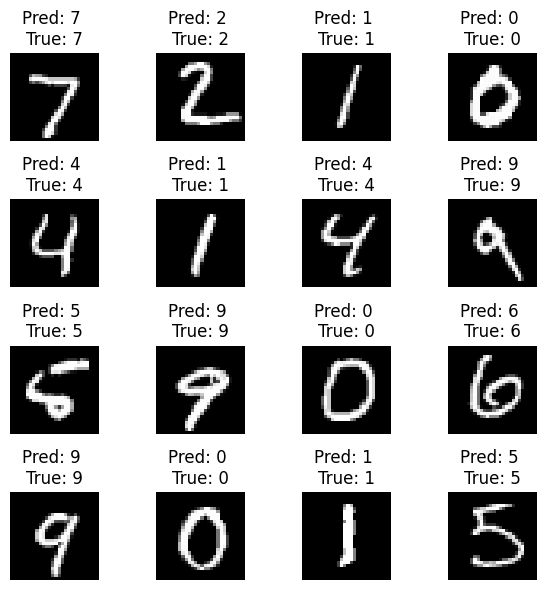

In [20]:
# 8. Show results
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title(f"Pred: {pred_labels[i]} \nTrue: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [25]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

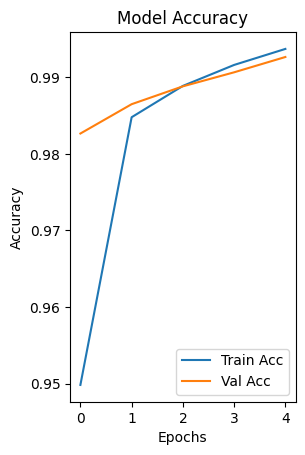

In [24]:
# Accuracy graph
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

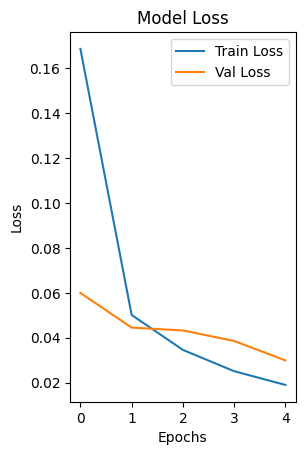

In [23]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


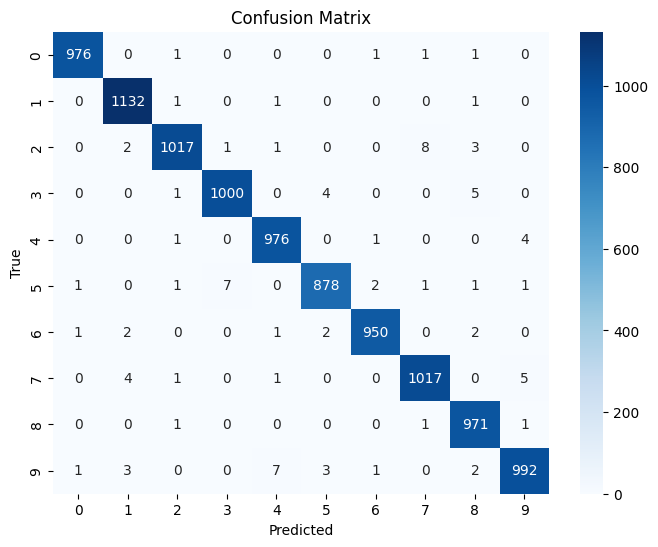

In [28]:
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

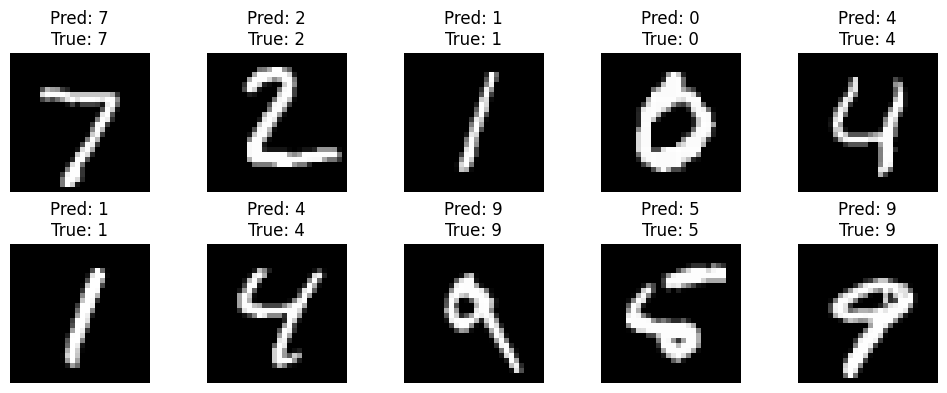

In [29]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()